In [67]:
import pandas as pd

In [68]:
df = pd.read_csv(r'C:\Users\AANCHAL\Documents\Projects - DS\Sentimental Analysis with LSTM\review (1).csv' )
df.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [69]:
df = df.drop(columns=['Unnamed: 0'])
df.head()


,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [70]:
df.shape

(999, 2)

In [71]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     999 non-null    object
 1   sentiment  999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [73]:
df['sentiment'].value_counts()

sentiment
1    500
0    499
Name: count, dtype: int64

In [74]:
df['Review_Length'] = df['review'].apply(lambda x: len(x.split()))
df.head()

,review,sentiment,Review_Length
0,Not sure who was more lost - the flat characte...,0,19
1,Attempting artiness with black & white and cle...,0,31
2,Very little music or anything to speak of.,0,8
3,The best scene in the movie was when Gerardo i...,1,21
4,"The rest of the movie lacks art, charm, meanin...",0,20


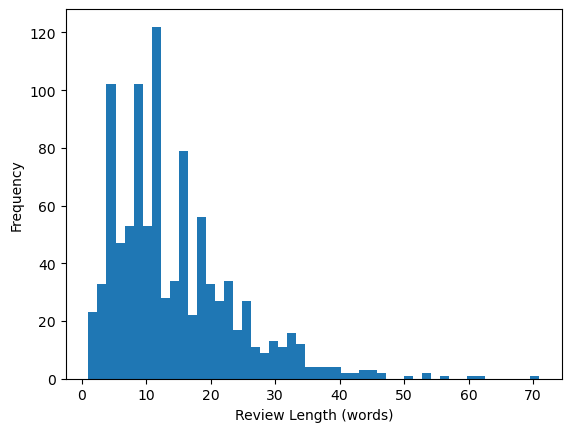

In [75]:
import matplotlib.pyplot as plt

plt.hist(df['Review_Length'], bins=50)
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.show()


In [76]:
df.describe()

,sentiment,Review_Length
count,999.000000,999.000000
mean,0.500501,14.355355
std,0.500250,9.615288
min,0.000000,1.000000
25%,0.000000,7.000000
50%,1.000000,12.000000
75%,1.000000,19.000000
max,1.000000,71.000000


In [77]:
# i/p and o/p split
x = df['review'].values
y = df['sentiment'].values

In [78]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)       

In [79]:
# create the tokenizer

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=5000,  # consider only the top 5000 words
    oov_token="<OOV>"  # token for out-of-vocabulary words
)

tokenizer.fit_on_texts(x_train)

In [80]:
# convert text to sequence

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)


In [81]:
print(x_train[0])
print(x_train_seq[0])


None of them are engaging or exciting.
[1008, 5, 109, 23, 1009, 56, 1010]


In [82]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 20
x_train_pad = pad_sequences(
    x_train_seq, maxlen=max_length, padding='post', truncating='post')
x_test_pad = pad_sequences(
    x_test_seq, maxlen=max_length, padding='post', truncating='post')
print(x_train_pad[0])
print(x_test_pad[0])


[1008    5  109   23 1009   56 1010    0    0    0    0    0    0    0
    0    0    0    0    0    0]
[   8  253    1 1721    1   19    7    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

vocab_size = 5000  # same as tokenizer
embedding_dim = 64  # typical starting point
lstm_units = 64
max_len = max_length  # same as used in padding

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    LSTM(lstm_units, return_sequences=False),
    Dropout(0.3),          # Dropout layer added here, 30% neurons ignored
    Dense(1, activation='sigmoid')
])


c:\Users\AANCHAL\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
history = model.fit(
    x_train_pad,
    y_train,
    epochs=5,          # start small
    batch_size=32,
    validation_split=0.2
)


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5321 - loss: 0.6934 - val_accuracy: 0.4750 - val_loss: 0.6936
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5133 - loss: 0.6899 - val_accuracy: 0.4938 - val_loss: 0.6908
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7089 - loss: 0.5951 - val_accuracy: 0.6875 - val_loss: 0.6056
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8873 - loss: 0.2703 - val_accuracy: 0.7063 - val_loss: 0.5756
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9687 - loss: 0.1324 - val_accuracy: 0.7188 - val_loss: 0.7860


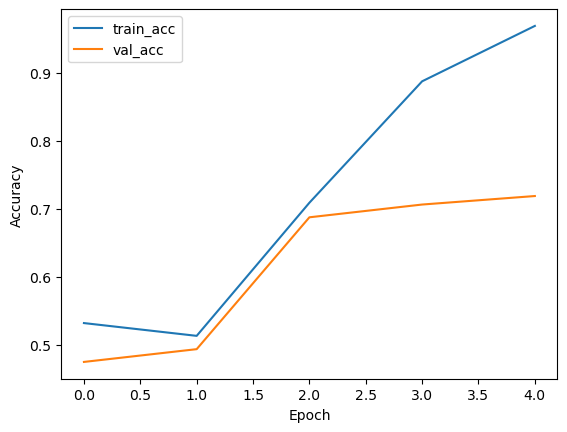

In [87]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [88]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(x_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       106
           1       0.69      0.79      0.74        94

    accuracy                           0.73       200
   macro avg       0.74      0.74      0.73       200
weighted avg       0.74      0.73      0.73       200

[[73 33]
 [20 74]]


In [90]:
# --- EASY UNSEEN DATA PREDICTION ---

import re
from tensorflow.keras.preprocessing.sequence import pad_sequences


new_reviews = [
    "The movie was amazing, I loved it!",
    "Worst film ever, completely boring.",
    "The movie was okay, not great but not terrible."
    
]

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

new_reviews_clean = [clean_text(r) for r in new_reviews]

# 3️⃣ Tokenize and pad
new_seq = tokenizer.texts_to_sequences(new_reviews_clean)
new_pad = pad_sequences(new_seq, maxlen=max_len, padding='post', truncating='post')

# 4️⃣ Predict
pred_probs = model.predict(new_pad)
pred_labels = (pred_probs > 0.5).astype(int)

# 5️⃣ Print results
for review, label, prob in zip(new_reviews, pred_labels, pred_probs):
    sentiment = "Positive" if label[0] == 1 else "Negative"
    print(f"Review: {review}")
    print(f"Predicted sentiment: {sentiment} (prob={prob[0]:.2f})\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Review: The movie was amazing, I loved it!
Predicted sentiment: Positive (prob=0.99)

Review: Worst film ever, completely boring.
Predicted sentiment: Negative (prob=0.01)

Review: The movie was okay, not great but not terrible.
Predicted sentiment: Negative (prob=0.15)



In [91]:
# save model
model.save('sentiment_lstm_model.h5')

In [92]:
# Save tokenizer as JSON
tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w") as f:
    f.write(tokenizer_json)
